## Devoir de prediction des prix des maisons en utilisant le machine learning 

**MERAD Khedoudja Rym**

**IA Cheffe de projet IA specialité data science**

**M2 E-learning**

## Import des bibliothèques communes

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

## Import des données 

In [5]:
donnees = pd.read_csv("Data/Data_clean.csv")
print(donnees.head())


   Unnamed: 0  Avg. Area Income  Avg. Area House Age  \
0           0      79545.458574             5.682861   
1           1      79248.642455             6.002900   
2           2      61287.067179             5.865890   
3           3      63345.240046             7.188236   
4           4      59982.197226             5.040555   

   Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population  \
0                   7.009188                          4.09     23086.800503   
1                   6.730821                          3.09     40173.072174   
2                   8.512727                          5.13     36882.159400   
3                   5.586729                          3.26     34310.242831   
4                   7.839388                          4.23     26354.109472   

          Price                                            Address  
0  1.059034e+06  208 Michael Ferry Apt. 674 Laurabury, NE 37010...  
1  1.505891e+06  188 Johnson Views Suite 079 Lake 

## Analyse de données

Comment est fait notre dataset? 

8 colonnes

Pas de Nan

In [6]:
donnees.shape

(5000, 8)

In [7]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   float64
 3   Avg. Area Number of Rooms     5000 non-null   float64
 4   Avg. Area Number of Bedrooms  5000 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


Pour commencer il faut visualiser comment les données qui nous interessent sont corrélées avec notre target (price)

Text(0.5, 1.0, 'Area and price')

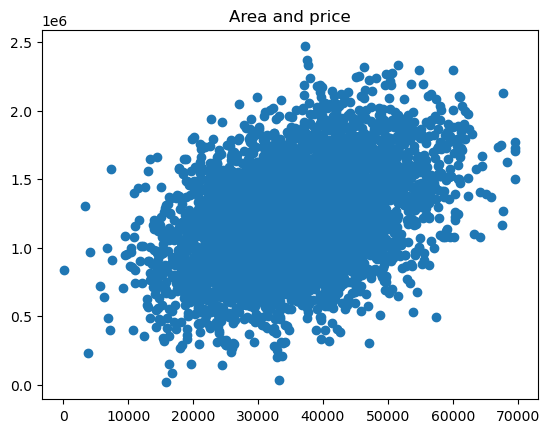

In [8]:
plt.scatter(donnees["Area Population"],donnees["Price"])
plt.title("Area and price")


Text(0.5, 1.0, 'AVG House age')

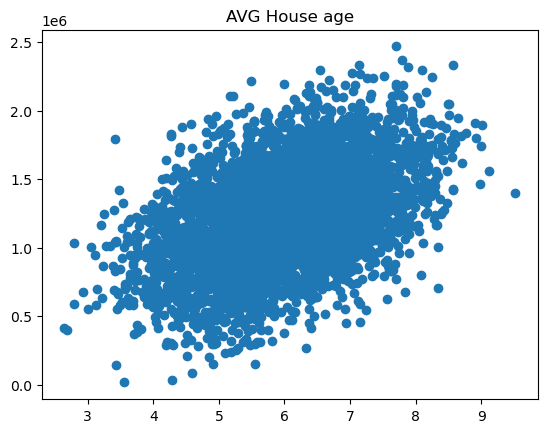

In [9]:
plt.scatter(donnees["Avg. Area House Age"],donnees["Price"])
plt.title("AVG House age")

Text(0.5, 1.0, 'Avg. Area Income')

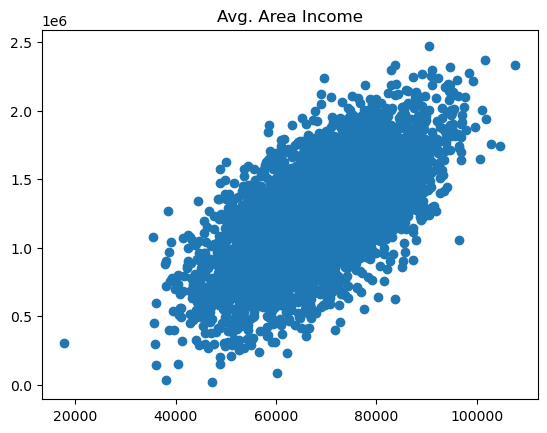

In [10]:
plt.scatter(donnees["Avg. Area Income"],donnees["Price"])
plt.title("Avg. Area Income")

Area income est celle qui agit le plus sur price on le voit à la courbure qu'elle donne à son nage de points

Puis il faut quantifier ce taux de corrélation entre la target et les variables quantitatives

C:\Users\rymkm\AppData\Local\Temp\ipykernel_12716\4272141016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlation = donnees.corr()


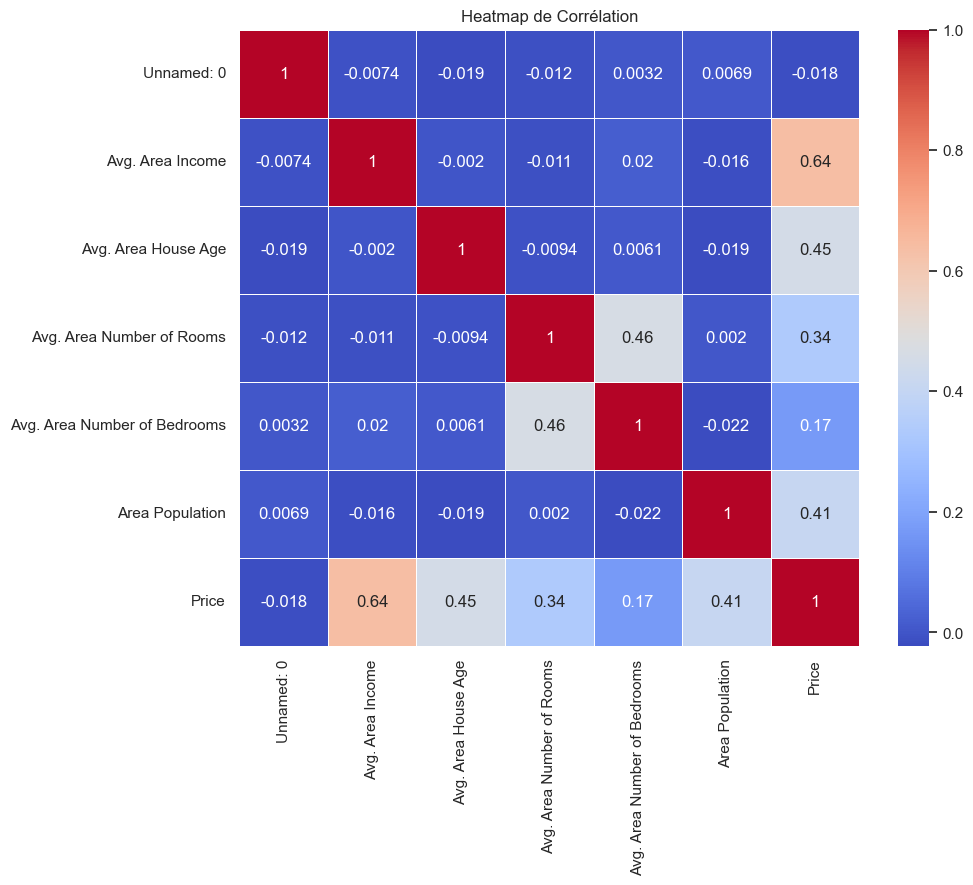

In [11]:
matrice_correlation = donnees.corr()
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Heatmap de Corrélation')
plt.show()

## Prediction par la methode de regression multiple

#### Separer target et features ici la target est le prix des maisons

En ne gardant que les colonnes pertinentes corrélées avec le prix 
j'ai retiré le nombre de chambres et le nombre de chambres à coucher afin d'aleger le programme et de rendre la prediction plus pertinente car elles avaient des corrélations basses avec le prix (<0.5)

In [12]:
# Séparer les features (X) et la variable cible (y)
x = donnees[['Avg. Area Income', 'Avg. Area House Age', 'Area Population']]
y = donnees['Price']

#### Voir la distribution des données 

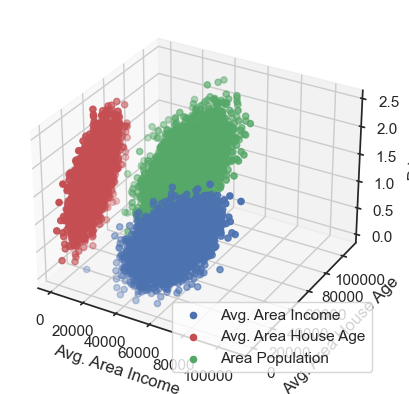

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['Avg. Area Income'], x['Avg. Area House Age'], y, label='Avg. Area Income')
ax.scatter(x['Avg. Area House Age'], x['Area Population'], y, c='r', label='Avg. Area House Age')
ax.scatter(x['Area Population'], x['Avg. Area Income'], y, c='g', label='Area Population')

ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Price')

plt.legend()
plt.show()


#### Sahape et reshape de y

In [14]:
#s'assurer du shape
print(x.shape)
print(y.shape)

(5000, 3)
(5000,)


In [15]:
#Faire un reshape de y
y = y.values.reshape(-1, 1)
print(y.shape)


(5000, 1)


#### Definir la matrice X

In [16]:
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X)

(5000, 4)
[[7.95454586e+04 5.68286132e+00 2.30868005e+04 1.00000000e+00]
 [7.92486425e+04 6.00289981e+00 4.01730722e+04 1.00000000e+00]
 [6.12870672e+04 5.86588984e+00 3.68821594e+04 1.00000000e+00]
 ...
 [6.33906869e+04 7.25059061e+00 3.32661455e+04 1.00000000e+00]
 [6.80013312e+04 5.53438842e+00 4.26256202e+04 1.00000000e+00]
 [6.55105818e+04 5.99230531e+00 4.65012838e+04 1.00000000e+00]]


#### Definir Theta

In [17]:
theta = np.random.randn(4, 1)
print(theta)


[[-2.40621439]
 [ 0.27640691]
 [ 1.13282897]
 [-2.37889075]]


### Definir les méthodes 

#### definir le modele

In [18]:
def model(X,theta):
    return X.dot(theta)

#### Definir le cout 

In [19]:
def cost_function(X,y,theta):
    m= len(y)
    return (1/(2*m)) * np.sum((model(X,theta)-y)**2)

#### Gradient

In [20]:
def grad(X,y,theta): 
    m=len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

#### Definir la methode du gradient 
**alpha**: Learning rate

In [21]:
def gradient_descent(X,y,theta,alpha,n_iterations):
    cost_history= np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta- alpha*grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta,cost_history

#### L'indice de performance

In [22]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

### Train test 

In [23]:
n_iterations = 10000
alpha = 0.01
theta_final, cost_history = gradient_descent(X,y,theta,alpha,n_iterations)

C:\Users\rymkm\AppData\Local\Temp\ipykernel_12716\3437190935.py:3: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((model(X,theta)-y)**2)
c:\Users\rymkm\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\rymkm\AppData\Local\Temp\ipykernel_12716\2025274208.py:4: RuntimeWarning: invalid value encountered in subtract
  theta = theta- alpha*grad(X,y,theta)


In [24]:
predictions = model(X,theta_final)

tracer les predictions et les données réelles 

In [25]:
n_iterations=1000
learning_rate=0.00000001

theta_final, cost_history= gradient_descent(X,y,theta,learning_rate,n_iterations)


C:\Users\rymkm\AppData\Local\Temp\ipykernel_12716\3437190935.py:3: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((model(X,theta)-y)**2)
C:\Users\rymkm\AppData\Local\Temp\ipykernel_12716\2025274208.py:4: RuntimeWarning: invalid value encountered in subtract
  theta = theta- alpha*grad(X,y,theta)


Droite d'apprentissage

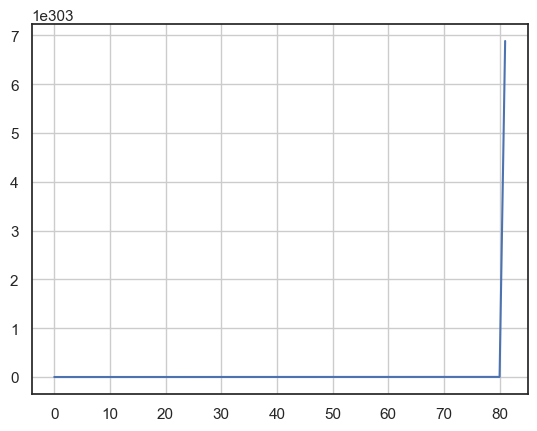

In [26]:
cost_function(X,y,theta)
plt.plot(range(n_iterations),cost_history)
plt.grid()

Performance du modèle

In [27]:
coef_determination(y,predictions)

nan

**Le modèle est performant à 50%**

Ce n'est pas concluant il faut ajuster le modèle avec B pour arriver à AX²+ BX ...

In [28]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
predictions=model(X,b)
print(coef_determination(y,predictions))

0.798054850001219


**L'accuracy du modèle augmente et est de 80% après l'ajout de B**

### Entrainer le modèle avec B

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
b = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
predictions_test=model(X_test,b) 
coef_determination(y_test,predictions_test)

0.8116422056122016

**Le coeficient de determination est proche de 1 (0.83) ou 83%, on peut dire que le modèle fonctionne bien**

## Paramètres optimaux de Theta

In [48]:
def least_squares(X, y):

    # Ajoute une colonne de 1 pour prendre en compte le terme constant
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))
    # Calcule les paramètres optimaux theta
    theta_optimal = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y
    return theta_optimal

theta_least_squares = least_squares(x, y)
print(theta_least_squares)


[[-1.77298789e+06]
 [ 2.14562449e+01]
 [ 1.64495950e+05]
 [ 1.52168762e+01]]
